In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
states_dict = {
        'AK': ['Alaska', 3],
        'AL': ['Alabama', 9],
        'AR': ['Arkansas', 6],
        'AZ': ['Arizona', 11],
        'CA': ['California', 55],
        'CO': ['Colorado', 9],
        'CT': ['Connecticut', 7],
        'DC': ['District of Columbia', 3],
        'DE': ['Delaware', 3],
        'FL': ['Florida', 29],
        'GA': ['Georgia', 16],
        'HI': ['Hawaii', 4],
        'IA': ['Iowa', 6],
        'ID': ['Idaho', 4],
        'IL': ['Illinois', 20],
        'IN': ['Indiana', 11],
        'KS': ['Kansas', 6],
        'KY': ['Kentucky', 8],
        'LA': ['Louisiana', 8],
        'MA': ['Massachusetts', 11],
        'MD': ['Maryland', 10],
        'ME': ['Maine', 4],
        'MI': ['Michigan', 16],
        'MN': ['Minnesota', 10],
        'MO': ['Missouri', 10],
        'MS': ['Mississippi', 6],
        'MT': ['Montana', 3],
        'NC': ['North Carolina', 15],
        'ND': ['North Dakota', 3],
        'NE': ['Nebraska', 5],
        'NH': ['New Hampshire', 4],
        'NJ': ['New Jersey', 14],
        'NM': ['New Mexico', 5],
        'NV': ['Nevada', 6],
        'NY': ['New York', 29],
        'OH': ['Ohio', 18],
        'OK': ['Oklahoma', 7],
        'OR': ['Oregon', 7],
        'PA': ['Pennsylvania', 20],
        'RI': ['Rhode Island', 4],
        'SC': ['South Carolina', 9],
        'SD': ['South Dakota', 3],
        'TN': ['Tennessee', 11],
        'TX': ['Texas' ,38],
        'UT': ['Utah', 6],
        'VA': ['Virginia', 13],
        'VT': ['Vermont', 3],
        'WA': ['Washington', 12],
        'WI': ['Wisconsin', 10],
        'WV': ['West Virginia', 5],
        'WY': ['Wyoming', 3]
}

In [3]:
df_polls = pd.read_csv('../data/processed/all_polls.csv')
df_election = pd.read_csv('../data/processed/actual_election_result.csv')

In [5]:
print(df_polls.shape)
print(df_election.shape)

(255, 4)
(204, 3)


In [6]:
df_polls['two_party_sum'] = df_polls['dem_perc'] + df_polls['gop_perc']

In [7]:
df_polls['dem_ratio'] = df_polls['dem_perc'] / df_polls['two_party_sum']
df_polls['gop_ratio'] = df_polls['gop_perc'] / df_polls['two_party_sum']
df_polls = df_polls.drop(['dem_perc', 'gop_perc', 'two_party_sum'], axis=1)


In [8]:
df_polls.columns = ['year', 'state', 'dem_perc', 'gop_perc']

df_polls.head(15)

,year,state,dem_perc,gop_perc
0,2004,AL,0.395566,0.604434
1,2004,AK,0.353453,0.646547
2,2004,AZ,0.453191,0.546809
3,2004,AR,0.470802,0.529198
4,2004,CA,0.549308,0.450692
5,2004,CO,0.479993,0.520007
6,2004,CT,0.559816,0.440184
7,2004,DE,0.543025,0.456975
8,2004,DC,0.891906,0.108094
9,2004,FL,0.497410,0.502590


In [9]:
def dem_voting_smaple_generator(dem, size = 1000):
    return pd.DataFrame({'vote' : np.where(np.random.random(size = 1000) > dem, 'gop', 'dem')})

def gop_voting_smaple_generator(gop, size = 1000):
    return pd.DataFrame({'vote' : np.where(np.random.random(size = 1000) > gop, 'dem', 'gop')})

def get_sample_distribution(dem, gop, size = 1000):   
    df_dem = pd.DataFrame([dem_voting_smaple_generator(dem).vote.value_counts(normalize=True) for i in range(100)])
    df_gop = pd.DataFrame([gop_voting_smaple_generator(gop).vote.value_counts(normalize=True) for i in range(100)])
    dem_list = np.array(df_dem.dem.values)
    gop_list = np.array(df_gop.gop.values)
    return dem_list, gop_list
    

In [10]:
def quantile_calculator(dem, gop, size = 1000):   
    df_dem = pd.DataFrame([dem_voting_smaple_generator(dem).vote.value_counts(normalize=True) for i in range(100)])
    df_gop = pd.DataFrame([gop_voting_smaple_generator(gop).vote.value_counts(normalize=True) for i in range(100)])
    dem_quantile = np.array(df_dem.dem.quantile([0.025, 0.975]))
    gop_quantile = np.array(df_gop.gop.quantile([0.025, 0.975]))
    return round(dem_quantile[0],2), round(dem_quantile[1],2), round(gop_quantile[0],2), round(gop_quantile[1],2)
    

In [11]:
df_polls[['dem_lower', 'dem_higher', 'gop_lower', 'gop_higher']] = df_polls.apply(
    lambda x : quantile_calculator(x['dem_perc'], x['gop_perc']), axis =1, result_type='expand')

In [12]:
df_polls.head(10)

,year,state,dem_perc,gop_perc,dem_lower,dem_higher,gop_lower,gop_higher
0,2004,AL,0.395566,0.604434,0.37,0.43,0.58,0.63
1,2004,AK,0.353453,0.646547,0.32,0.38,0.62,0.67
2,2004,AZ,0.453191,0.546809,0.42,0.49,0.52,0.58
3,2004,AR,0.470802,0.529198,0.44,0.50,0.49,0.56
4,2004,CA,0.549308,0.450692,0.52,0.58,0.42,0.49
5,2004,CO,0.479993,0.520007,0.45,0.52,0.49,0.55
6,2004,CT,0.559816,0.440184,0.53,0.59,0.41,0.47
7,2004,DE,0.543025,0.456975,0.51,0.57,0.43,0.49
8,2004,DC,0.891906,0.108094,0.87,0.91,0.09,0.13
9,2004,FL,0.497410,0.502590,0.47,0.53,0.46,0.53


In [11]:
df_polls2 = df_polls.drop(['dem_perc', 'gop_perc'], axis=1)

In [15]:
df2020 = df_polls[df_polls.year == 2020]


In [16]:
df2020.round(2).head(7)

,year,state,dem_perc,gop_perc,dem_lower,dem_higher,gop_lower,gop_higher
204,2020,AK,0.48,0.52,0.45,0.51,0.49,0.55
205,2020,AL,0.42,0.58,0.38,0.45,0.55,0.61
206,2020,AR,0.49,0.51,0.46,0.52,0.48,0.54
207,2020,AZ,0.52,0.48,0.49,0.54,0.45,0.51
208,2020,CA,0.66,0.34,0.63,0.69,0.31,0.37
209,2020,CO,0.58,0.42,0.55,0.60,0.39,0.45
210,2020,CT,0.60,0.40,0.57,0.63,0.38,0.43


In [17]:
df2020[['dem_list', 'gop_list']] = df2020.apply(
    lambda x : get_sample_distribution(x['dem_perc'], x['gop_perc']), axis =1, result_type='expand')

C:\Users\Rishbha\Anaconda3\envs\poll2020\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
df2020.shape

(51, 10)

In [19]:
row1 = df2020.iloc[2,:]

<AxesSubplot:>

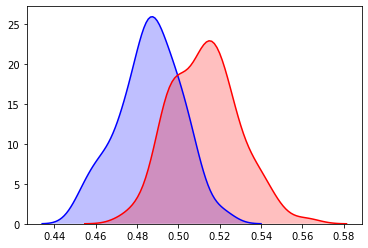

In [20]:

sns.kdeplot(row1.dem_list, shade=True, color='b')
sns.kdeplot(row1.gop_list, shade=True, color='r')


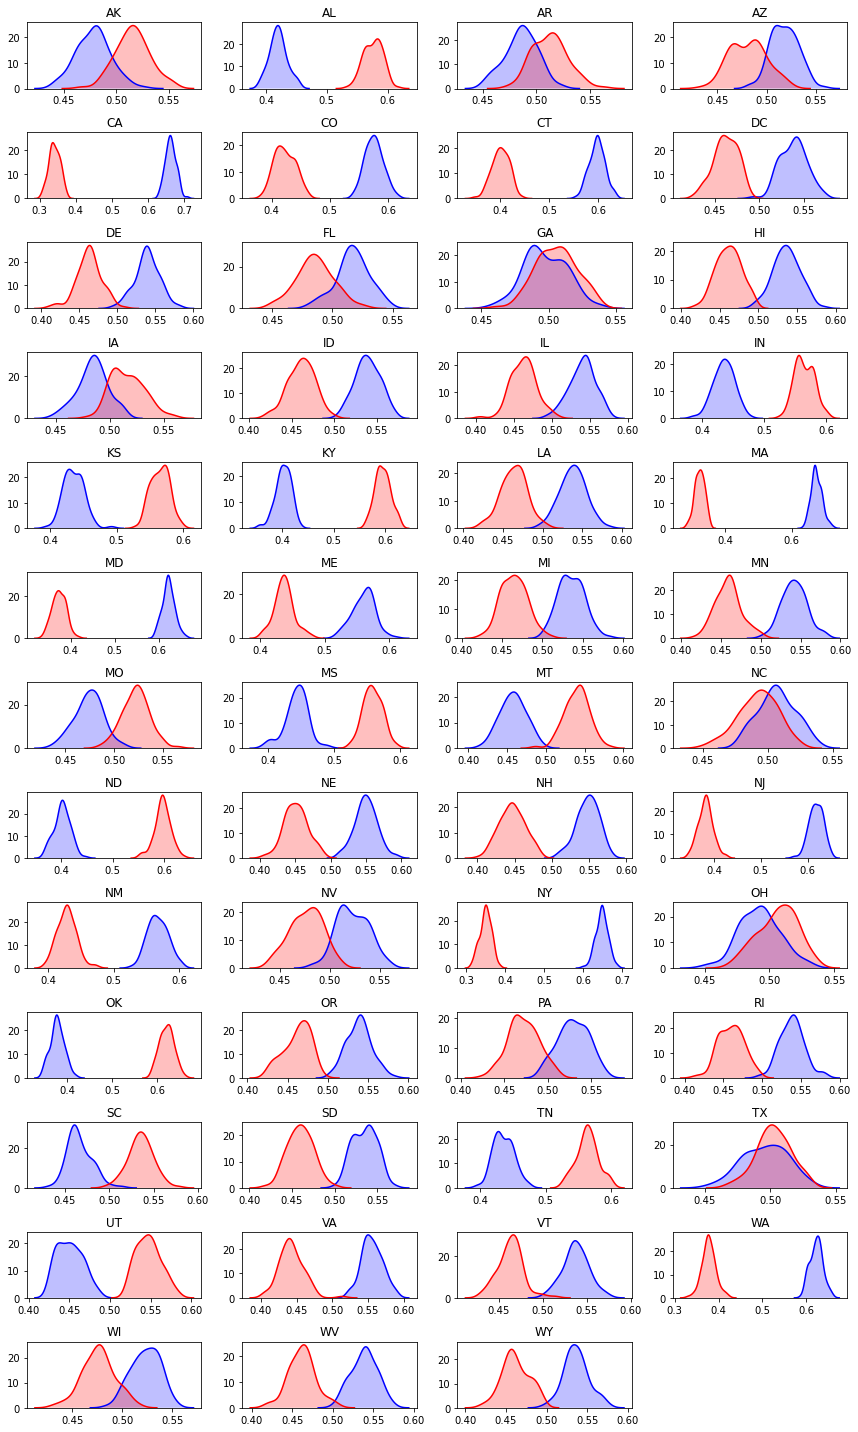

In [21]:
n = len(df2020)//4 +1
f, ax = plt.subplots(n, 4, figsize=(12, 20))

for i in range(n):
    for j in range(4):
        if (i*4+j) < 51:
            row = df2020.iloc[i*4+j,:]
            sns.kdeplot(row.dem_list, shade=True, color='b', ax = ax[i][j])
            sns.kdeplot(row.gop_list, shade=True, color='r', ax = ax[i][j])
            ax[i][j].set_title(row.state)
        else:
            f.delaxes(ax[i,j])

plt.tight_layout()

In [18]:
df_previous = pd.read_csv('../data/processed/previous_year_result.csv')
df_previous.columns = ['state', 'year', 'last_election']

In [19]:
df_demographic = pd.read_csv('../data/processed/demographic.csv')

In [20]:
df_polls2 = df_polls2.drop(df_polls2[(df_polls2.state == 'Maine CD-2') | (df_polls2.state ==  'Maine CD-1')].index)
df_polls2.shape

(255, 6)

In [21]:
df_all = df_previous.merge(df_demographic, on = ['year', 'state']).merge(df_polls2, on = ['year', 'state'])

In [22]:
df_all.head()

,state,year,last_election,female_black_adult,female_black_elder,female_other_adult,female_other_elder,female_white_adult,female_white_elder,male_black_adult,male_black_elder,male_other_adult,male_other_elder,male_white_adult,male_white_elder,dem_lower,dem_higher,gop_lower,gop_higher
0,AK,2004,1,0.013745,0.002134,0.098324,0.022630,0.268684,0.074948,0.016521,0.002260,0.097007,0.019091,0.302127,0.082530,0.33,0.38,0.62,0.67
1,AL,2004,1,0.103038,0.033192,0.009598,0.002488,0.242872,0.131649,0.088996,0.022915,0.009401,0.001990,0.247232,0.106630,0.36,0.43,0.57,0.63
2,AR,2004,1,0.059990,0.017814,0.011884,0.003054,0.272915,0.150283,0.054186,0.012708,0.011303,0.002490,0.279410,0.123963,0.44,0.50,0.50,0.56
3,AZ,2004,1,0.013103,0.003048,0.035803,0.007955,0.298892,0.146573,0.015161,0.002803,0.034379,0.006073,0.310142,0.126068,0.42,0.48,0.52,0.57
4,CA,2004,0,0.026222,0.008076,0.067356,0.020129,0.274694,0.109844,0.026014,0.006324,0.063050,0.016015,0.290776,0.091500,0.52,0.58,0.42,0.48


In [23]:
print(df_polls2.columns)
print(df_previous.columns)
print(df_demographic.columns)

Index(['year', 'state', 'dem_lower', 'dem_higher', 'gop_lower', 'gop_higher'], dtype='object')
Index(['state', 'year', 'last_election'], dtype='object')
Index(['state', 'female_black_adult', 'female_black_elder',
       'female_other_adult', 'female_other_elder', 'female_white_adult',
       'female_white_elder', 'male_black_adult', 'male_black_elder',
       'male_other_adult', 'male_other_elder', 'male_white_adult',
       'male_white_elder', 'year'],
      dtype='object')


In [24]:
df_election.head()

,state_po,year,winner
0,AK,2004,1
1,AL,2004,1
2,AR,2004,1
3,AZ,2004,1
4,CA,2004,0


In [25]:
def get_winner(row):
    if row['perc_dem'] > row['perc_gop']:
        return 0
    else :
        return 1

In [26]:
# df_election['winner'] = df_election.apply(lambda x : get_winner(x), axis=1)

In [27]:
# df_all = df_all[df_all['year'] != 2004]

In [28]:
# df_election = df_election[df_election['year'] != 2004]

In [29]:
df_all[df_all['year'] != 2020].head()


,state,year,last_election,female_black_adult,female_black_elder,female_other_adult,female_other_elder,female_white_adult,female_white_elder,male_black_adult,male_black_elder,male_other_adult,male_other_elder,male_white_adult,male_white_elder,dem_lower,dem_higher,gop_lower,gop_higher
0,AK,2004,1,0.013745,0.002134,0.098324,0.022630,0.268684,0.074948,0.016521,0.002260,0.097007,0.019091,0.302127,0.082530,0.33,0.38,0.62,0.67
1,AL,2004,1,0.103038,0.033192,0.009598,0.002488,0.242872,0.131649,0.088996,0.022915,0.009401,0.001990,0.247232,0.106630,0.36,0.43,0.57,0.63
2,AR,2004,1,0.059990,0.017814,0.011884,0.003054,0.272915,0.150283,0.054186,0.012708,0.011303,0.002490,0.279410,0.123963,0.44,0.50,0.50,0.56
3,AZ,2004,1,0.013103,0.003048,0.035803,0.007955,0.298892,0.146573,0.015161,0.002803,0.034379,0.006073,0.310142,0.126068,0.42,0.48,0.52,0.57
4,CA,2004,0,0.026222,0.008076,0.067356,0.020129,0.274694,0.109844,0.026014,0.006324,0.063050,0.016015,0.290776,0.091500,0.52,0.58,0.42,0.48


In [30]:
df_train = pd.merge(df_all[df_all['year'] != 2020], df_election[['state_po', 'year', 'winner']] ,
                                                                   left_on = ['year', 'state'],
                                                                    right_on = ['year', 'state_po']).drop('state_po', axis=1)

In [31]:
df_train.head()

,state,year,last_election,female_black_adult,female_black_elder,female_other_adult,female_other_elder,female_white_adult,female_white_elder,male_black_adult,male_black_elder,male_other_adult,male_other_elder,male_white_adult,male_white_elder,dem_lower,dem_higher,gop_lower,gop_higher,winner
0,AK,2004,1,0.013745,0.002134,0.098324,0.022630,0.268684,0.074948,0.016521,0.002260,0.097007,0.019091,0.302127,0.082530,0.33,0.38,0.62,0.67,1
1,AL,2004,1,0.103038,0.033192,0.009598,0.002488,0.242872,0.131649,0.088996,0.022915,0.009401,0.001990,0.247232,0.106630,0.36,0.43,0.57,0.63,1
2,AR,2004,1,0.059990,0.017814,0.011884,0.003054,0.272915,0.150283,0.054186,0.012708,0.011303,0.002490,0.279410,0.123963,0.44,0.50,0.50,0.56,1
3,AZ,2004,1,0.013103,0.003048,0.035803,0.007955,0.298892,0.146573,0.015161,0.002803,0.034379,0.006073,0.310142,0.126068,0.42,0.48,0.52,0.57,1
4,CA,2004,0,0.026222,0.008076,0.067356,0.020129,0.274694,0.109844,0.026014,0.006324,0.063050,0.016015,0.290776,0.091500,0.52,0.58,0.42,0.48,0


In [32]:
df_train.head()
df_train.shape

(203, 20)

In [34]:
df_train.to_csv('../data/processed/data from 2004 to 2016.csv', index= False)

In [36]:
df_test = df_all[df_all['year'] == 2020]

In [37]:
df_test.shape

(51, 19)

In [38]:
df_test.to_csv('../data/processed/data from 2020.csv', index= False)

In [197]:
X_train = df_train.drop(['year', 'winner', 'last_election'], axis=1)
X_train = pd.get_dummies(X_train)
y_train = df_train['winner']
X_train.head()

,female_black_adult,female_black_elder,female_other_adult,female_other_elder,female_white_adult,female_white_elder,male_black_adult,male_black_elder,male_other_adult,male_other_elder,male_white_adult,male_white_elder,dem_lower,dem_higher,gop_lower,gop_higher,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.013745,0.002134,0.098324,0.022630,0.268684,0.074948,0.016521,0.002260,0.097007,0.019091,0.302127,0.082530,0.32,0.38,0.62,0.68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.103038,0.033192,0.009598,0.002488,0.242872,0.131649,0.088996,0.022915,0.009401,0.001990,0.247232,0.106630,0.37,0.42,0.57,0.63,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.059990,0.017814,0.011884,0.003054,0.272915,0.150283,0.054186,0.012708,0.011303,0.002490,0.279410,0.123963,0.44,0.50,0.50,0.56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.013103,0.003048,0.035803,0.007955,0.298892,0.146573,0.015161,0.002803,0.034379,0.006073,0.310142,0.126068,0.42,0.48,0.51,0.58,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.026222,0.008076,0.067356,0.020129,0.274694,0.109844,0.026014,0.006324,0.063050,0.016015,0.290776,0.091500,0.52,0.57,0.42,0.48,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [198]:
X_test = df_test.drop(['year', 'last_election'], axis=1)
X_test = pd.get_dummies(X_test)
X_test.head()

,female_black_adult,female_black_elder,female_other_adult,female_other_elder,female_white_adult,female_white_elder,male_black_adult,male_black_elder,male_other_adult,male_other_elder,male_white_adult,male_white_elder,dem_lower,dem_higher,gop_lower,gop_higher,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
203,0.011792,0.003871,0.101843,0.037771,0.204780,0.115909,0.017460,0.004384,0.103763,0.031550,0.242190,0.124686,0.45,0.51,0.49,0.55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204,0.095205,0.047878,0.013159,0.005215,0.209009,0.153684,0.082557,0.034958,0.012608,0.004267,0.209846,0.131614,0.39,0.45,0.55,0.60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,0.054504,0.025543,0.017026,0.006023,0.241120,0.171250,0.049771,0.019560,0.017022,0.005054,0.245108,0.148019,0.47,0.52,0.48,0.54,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
206,0.017554,0.006259,0.042456,0.014770,0.248000,0.177777,0.019700,0.005714,0.041648,0.011085,0.257990,0.157046,0.49,0.55,0.45,0.52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,0.022080,0.010961,0.077494,0.036064,0.229816,0.130435,0.023232,0.008966,0.073386,0.028603,0.243606,0.115357,0.64,0.68,0.31,0.36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [200]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
df_test['log_predict'] = lr_predict

<ipython-input-200-29d3b015f1d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['log_predict'] = lr_predict


In [201]:
rf = RandomForestClassifier(max_features=10, n_estimators = 50)
# rf = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
df_test['rf_predict'] = rf_predict

<ipython-input-201-6a9112edc7b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['rf_predict'] = rf_predict


In [202]:
xgb = XGBClassifier()
# rf = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
df_test['xgb_predict'] = xgb_predict

<ipython-input-202-79ac115738cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['xgb_predict'] = xgb_predict


In [203]:
df_test['votes'] = df_test['state'].apply(lambda x: states_dict[x][1])

<ipython-input-203-7fe026097d2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['votes'] = df_test['state'].apply(lambda x: states_dict[x][1])


In [204]:
lr_result = np.sum(df_test['log_predict']*df_test['votes'])
lr_result

230

In [205]:
rf_result = np.sum(df_test['rf_predict']*df_test['votes'])
rf_result

235

In [206]:
xgb_result = np.sum(df_test['xgb_predict']*df_test['votes'])
xgb_result

224

In [207]:
df_test['total'] = df_test['log_predict'] + df_test['rf_predict'] + df_test['xgb_predict']

<ipython-input-207-a47c18b39617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['total'] = df_test['log_predict'] + df_test['rf_predict'] + df_test['xgb_predict']


In [208]:
df_test

,state,year,last_election,female_black_adult,female_black_elder,female_other_adult,female_other_elder,female_white_adult,female_white_elder,male_black_adult,male_black_elder,male_other_adult,male_other_elder,male_white_adult,male_white_elder,dem_lower,dem_higher,gop_lower,gop_higher,log_predict,rf_predict,xgb_predict,votes,total
203,AK,2020,1,0.011792,0.003871,0.101843,0.037771,0.204780,0.115909,0.017460,0.004384,0.103763,0.031550,0.242190,0.124686,0.45,0.51,0.49,0.55,1,1,1,3,3
204,AL,2020,1,0.095205,0.047878,0.013159,0.005215,0.209009,0.153684,0.082557,0.034958,0.012608,0.004267,0.209846,0.131614,0.39,0.45,0.55,0.60,1,1,1,9,3
205,AR,2020,1,0.054504,0.025543,0.017026,0.006023,0.241120,0.171250,0.049771,0.019560,0.017022,0.005054,0.245108,0.148019,0.47,0.52,0.48,0.54,1,1,1,6,3
206,AZ,2020,1,0.017554,0.006259,0.042456,0.014770,0.248000,0.177777,0.019700,0.005714,0.041648,0.011085,0.257990,0.157046,0.49,0.55,0.45,0.52,1,0,1,11,2
207,CA,2020,0,0.022080,0.010961,0.077494,0.036064,0.229816,0.130435,0.023232,0.008966,0.073386,0.028603,0.243606,0.115357,0.64,0.68,0.31,0.36,0,0,0,55,0
208,CO,2020,0,0.014746,0.005451,0.030608,0.008966,0.278496,0.159932,0.018583,0.005299,0.029305,0.007159,0.298489,0.142966,0.55,0.60,0.39,0.45,0,0,0,9,0
209,CT,2020,0,0.043756,0.018231,0.029027,0.008374,0.236581,0.181918,0.040958,0.013348,0.027791,0.007116,0.237991,0.154910,0.57,0.63,0.38,0.43,0,0,0,7,0
210,DC,2020,0,0.155916,0.089793,0.037714,0.007215,0.193483,0.048783,0.132291,0.060984,0.028760,0.004477,0.192631,0.047953,0.52,0.57,0.43,0.49,0,0,0,3,0
211,DE,2020,0,0.079691,0.039321,0.025107,0.008956,0.196602,0.172919,0.071747,0.029789,0.024938,0.007275,0.195572,0.148084,0.50,0.57,0.44,0.49,0,0,0,3,0
212,FL,2020,1,0.057082,0.025506,0.019410,0.008178,0.217659,0.188761,0.054247,0.019908,0.017872,0.006354,0.222308,0.162715,0.49,0.55,0.45,0.52,0,1,1,29,2


In [210]:
df_test[(df_test.total == 1) | (df_test.total == 2)][['last_election', 'state', 'votes', 'total']]

,last_election,state,votes,total
206,1,AZ,11,2
212,1,FL,29,2
216,1,ID,4,1
221,1,LA,8,1
225,1,MI,16,1
230,1,NC,15,1
232,1,NE,5,1
241,1,PA,20,2
244,1,SD,3,1
246,1,TX,38,2
